In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,accuracy_score,classification_report,precision_recall_curve,roc_auc_score,roc_curve,precision_recall_curve
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.tree import DecisionTreeClassifier as DTC

ModuleNotFoundError: No module named 'imblearn'

In [2]:
df = pd.read_csv('ola_driver_scaler.csv')

In [3]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19104.0,9551.500000,5.514994e+03,0.0,4775.75,9551.5,14327.25,19103.0
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.00,1417.0,2137.00,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.00,34.0,39.00,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.00,0.0,1.00,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.00,1.0,2.00,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.00,60087.0,83969.00,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.00,1.0,2.00,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.00,2.0,3.00,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.00,250000.0,699700.00,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.00,2.0,3.00,4.0


In [6]:
for i in df.columns:
    print(i,df[i].nunique())

Unnamed: 0 19104
MMM-YY 24
Driver_ID 2381
Age 36
Gender 2
City 29
Education_Level 3
Income 2383
Dateofjoining 869
LastWorkingDate 493
Joining Designation 5
Grade 5
Total Business Value 10181
Quarterly Rating 4


In [7]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [8]:
df.head(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [9]:
df['churn'] = df['LastWorkingDate'].fillna(0)

In [10]:
df['churn'] =[1 if x != 0 else x for x in df['churn']]

In [11]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,churn
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0


In [12]:
cat_col =[]
con_col =[]
for i in df.columns:
    if df[i].nunique() < 40:
        cat_col.append(i)
    else:
        con_col.append(i)

In [13]:
cat_col

['MMM-YY',
 'Age',
 'Gender',
 'City',
 'Education_Level',
 'Joining Designation',
 'Grade',
 'Quarterly Rating',
 'churn']

In [14]:
for i in df.columns:
    print(i,df[i].nunique())

MMM-YY 24
Driver_ID 2381
Age 36
Gender 2
City 29
Education_Level 3
Income 2383
Dateofjoining 869
LastWorkingDate 493
Joining Designation 5
Grade 5
Total Business Value 10181
Quarterly Rating 4
churn 2


In [15]:
df['MMM-YY']=df['MMM-YY'].astype('datetime64[ns]')

In [16]:
df['Dateofjoining'] = df['Dateofjoining'].astype('datetime64[ns]')
df['LastWorkingDate'] = df['LastWorkingDate'].astype('datetime64[ns]')

In [17]:
df['MMM-YY'].nunique()

24

In [18]:
df['month'] = df['MMM-YY'].dt.month

In [19]:
df['year'] = df['MMM-YY'].dt.year

In [20]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,churn,month,year
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,1,2019
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0,2,2019
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,1,3,2019
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,11,2020
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,12,2020


In [21]:
te = TargetEncoder()

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [22]:
te.fit(df['City'],df['churn'])
df['City']=te.transform(df['City'])

In [23]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,churn,month,year
0,2019-01-01,1,28.0,0.0,0.105948,2,57387,2018-12-24,NaT,1,1,2381060,2,0,1,2019
1,2019-02-01,1,28.0,0.0,0.105948,2,57387,2018-12-24,NaT,1,1,-665480,2,0,2,2019
2,2019-03-01,1,28.0,0.0,0.105948,2,57387,2018-12-24,2019-03-11,1,1,0,2,1,3,2019
3,2020-11-01,2,31.0,0.0,0.085386,2,67016,2020-11-06,NaT,2,2,0,1,0,11,2020
4,2020-12-01,2,31.0,0.0,0.085386,2,67016,2020-11-06,NaT,2,2,0,1,0,12,2020


In [24]:
# df.drop('MMM-YY',axis = 1,inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  float64       
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  churn           

In [26]:
knnImputer = KNNImputer(n_neighbors=3)

In [27]:
x=np.array(df['Age']).reshape(-1,1)

In [28]:
x=knnImputer.fit_transform(x)

In [29]:
x=pd.DataFrame(x)
x.isna().sum()

0    0
dtype: int64

In [30]:
# df = df.drop('Age',inplace = True,axis =1)


In [31]:
type(x)

pandas.core.frame.DataFrame

In [32]:
df['Age']=x[0]

In [33]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,churn,month,year
0,2019-01-01,1,28.0,0.0,0.105948,2,57387,2018-12-24,NaT,1,1,2381060,2,0,1,2019
1,2019-02-01,1,28.0,0.0,0.105948,2,57387,2018-12-24,NaT,1,1,-665480,2,0,2,2019
2,2019-03-01,1,28.0,0.0,0.105948,2,57387,2018-12-24,2019-03-11,1,1,0,2,1,3,2019
3,2020-11-01,2,31.0,0.0,0.085386,2,67016,2020-11-06,NaT,2,2,0,1,0,11,2020
4,2020-12-01,2,31.0,0.0,0.085386,2,67016,2020-11-06,NaT,2,2,0,1,0,12,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,0.076336,2,70254,2020-06-08,NaT,2,2,740280,3,0,8,2020
19100,2020-09-01,2788,30.0,0.0,0.076336,2,70254,2020-06-08,NaT,2,2,448370,3,0,9,2020
19101,2020-10-01,2788,30.0,0.0,0.076336,2,70254,2020-06-08,NaT,2,2,0,2,0,10,2020
19102,2020-11-01,2788,30.0,0.0,0.076336,2,70254,2020-06-08,NaT,2,2,200420,2,0,11,2020


In [34]:
np.round(df.isna().sum()/len(df)*100,2)

MMM-YY                   0.00
Driver_ID                0.00
Age                      0.00
Gender                   0.27
City                     0.00
Education_Level          0.00
Income                   0.00
Dateofjoining            0.00
LastWorkingDate         91.54
Joining Designation      0.00
Grade                    0.00
Total Business Value     0.00
Quarterly Rating         0.00
churn                    0.00
month                    0.00
year                     0.00
dtype: float64

In [35]:
df.shape

(19104, 16)

In [36]:
df['Gender'].dropna(inplace=True,axis = 0)

In [37]:
df = df[df['Gender'].notna()]

In [38]:
df.shape

(19052, 16)

In [39]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,churn,month,year
0,2019-01-01,1,28.0,0.0,0.105948,2,57387,2018-12-24,NaT,1,1,2381060,2,0,1,2019
1,2019-02-01,1,28.0,0.0,0.105948,2,57387,2018-12-24,NaT,1,1,-665480,2,0,2,2019
2,2019-03-01,1,28.0,0.0,0.105948,2,57387,2018-12-24,2019-03-11,1,1,0,2,1,3,2019
3,2020-11-01,2,31.0,0.0,0.085386,2,67016,2020-11-06,NaT,2,2,0,1,0,11,2020
4,2020-12-01,2,31.0,0.0,0.085386,2,67016,2020-11-06,NaT,2,2,0,1,0,12,2020


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19052 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19052 non-null  datetime64[ns]
 1   Driver_ID             19052 non-null  int64         
 2   Age                   19052 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19052 non-null  float64       
 5   Education_Level       19052 non-null  int64         
 6   Income                19052 non-null  int64         
 7   Dateofjoining         19052 non-null  datetime64[ns]
 8   LastWorkingDate       1611 non-null   datetime64[ns]
 9   Joining Designation   19052 non-null  int64         
 10  Grade                 19052 non-null  int64         
 11  Total Business Value  19052 non-null  int64         
 12  Quarterly Rating      19052 non-null  int64         
 13  churn           

In [41]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'churn', 'month',
       'year'],
      dtype='object')

In [42]:
grouped_df = df.groupby('Driver_ID').agg(reporting_start_date = ('MMM-YY','min'),
                                        reporting_end_date = ('MMM-YY','max'),
                                        age = ('Age','max'),
                                        gender = ('Gender','max'),
                                        city = ('City','max'),
                                        education = ('Education_Level','max'),
                                        joining_income = ('Income','min'),
                                        current_income =('Income','max'),
                                        joining_date = ('Dateofjoining','min'),
                                        exit_date=('LastWorkingDate','max'),
                                        designation = ('Joining Designation','min'),
                                        initial_grade = ('Grade','min'),
                                        current_grade = ('Grade','max'),
                                        total_bussiness = ('Total Business Value','sum'),
                                        initial_rating = ('Quarterly Rating','min'),
                                        current_rating = ('Quarterly Rating','max'))

In [43]:
grouped_df['quarterly_rating'] = grouped_df['current_rating']-grouped_df['initial_rating']

In [44]:
grouped_df['quarterly_rating'] = grouped_df['quarterly_rating'].apply(lambda x: 1 if x>0 else 0)

In [45]:
grouped_df['income_change'] = grouped_df['current_income']-grouped_df['joining_income']

In [46]:
grouped_df['income_change'] = grouped_df['income_change'].apply(lambda x: 1 if x>0 else 0)

In [47]:
grouped_df['income_change'].value_counts()

0    2337
1      44
Name: income_change, dtype: int64

In [48]:
grouped_df['quarterly_rating'].value_counts()

0    1278
1    1103
Name: quarterly_rating, dtype: int64

In [49]:
grouped_df['churn'] = (grouped_df['exit_date']-grouped_df['joining_date']).dt.days

In [50]:
grouped_df['churn']=np.round(grouped_df['churn']/30,2)

In [51]:
grouped_df['churn'] = grouped_df['churn'].fillna('0')

In [52]:
grouped_df['churn'].head()

Driver_ID
1    2.57
2       0
4    4.73
5     1.9
6       0
Name: churn, dtype: object

In [53]:
grouped_df.head()

,reporting_start_date,reporting_end_date,age,gender,city,education,joining_income,current_income,joining_date,exit_date,designation,initial_grade,current_grade,total_bussiness,initial_rating,current_rating,quarterly_rating,income_change,churn
Driver_ID,,,,,,,,,,,,,,,,,,,
1,2019-01-01,2019-03-01,28.0,0.0,0.105948,2,57387,57387,2018-12-24,2019-03-11,1,1,1,1715580,2,2,0,0,2.57
2,2020-11-01,2020-12-01,31.0,0.0,0.085386,2,67016,67016,2020-11-06,NaT,2,2,2,0,1,1,0,0,0
4,2019-12-01,2020-04-01,43.0,0.0,0.101933,2,65603,65603,2019-12-07,2020-04-27,2,2,2,350000,1,1,0,0,4.73
5,2019-01-01,2019-03-01,29.0,0.0,0.101923,0,46368,46368,2019-01-09,2019-03-07,1,1,1,120360,1,1,0,0,1.9
6,2020-08-01,2020-12-01,31.0,1.0,0.096154,1,78728,78728,2020-07-31,NaT,3,3,3,1265000,1,2,1,0,0


In [54]:
grouped_df['churn'] = [0 if x is '0' else 1 for x in grouped_df['churn']]

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Ashok kumar\AppData\Local\Temp\ipykernel_14516\2957724929.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  grouped_df['churn'] = [0 if x is '0' else 1 for x in grouped_df['churn']]


In [55]:
grouped_df['churn'].value_counts()

1    1611
0     770
Name: churn, dtype: int64

In [56]:
grouped_df.head(20)

,reporting_start_date,reporting_end_date,age,gender,city,education,joining_income,current_income,joining_date,exit_date,designation,initial_grade,current_grade,total_bussiness,initial_rating,current_rating,quarterly_rating,income_change,churn
Driver_ID,,,,,,,,,,,,,,,,,,,
1,2019-01-01,2019-03-01,28.000000,0.0,0.105948,2,57387,57387,2018-12-24,2019-03-11,1,1,1,1715580,2,2,0,0,1
2,2020-11-01,2020-12-01,31.000000,0.0,0.085386,2,67016,67016,2020-11-06,NaT,2,2,2,0,1,1,0,0,0
4,2019-12-01,2020-04-01,43.000000,0.0,0.101933,2,65603,65603,2019-12-07,2020-04-27,2,2,2,350000,1,1,0,0,1
5,2019-01-01,2019-03-01,29.000000,0.0,0.101923,0,46368,46368,2019-01-09,2019-03-07,1,1,1,120360,1,1,0,0,1
6,2020-08-01,2020-12-01,31.000000,1.0,0.096154,1,78728,78728,2020-07-31,NaT,3,3,3,1265000,1,2,1,0,0
8,2020-09-01,2020-11-01,34.000000,0.0,0.116525,0,70656,70656,2020-09-19,2020-11-15,3,3,3,0,1,1,0,0,1
11,2020-12-01,2020-12-01,28.000000,1.0,0.070812,2,42172,42172,2020-12-07,NaT,1,1,1,0,1,1,0,0,0
12,2019-07-01,2019-12-01,35.000000,0.0,0.105948,2,28116,28116,2019-06-29,2019-12-21,1,1,1,2607180,1,4,1,0,1
13,2019-01-01,2020-11-01,31.000000,0.0,0.070812,2,119227,119227,2015-05-28,2020-11-25,1,4,4,10213040,1,2,1,0,1


In [57]:
for i in grouped_df.columns:
    print(i,grouped_df[i].nunique())

reporting_start_date 24
reporting_end_date 24
age 37
gender 2
city 29
education 3
joining_income 2339
current_income 2339
joining_date 869
exit_date 493
designation 5
initial_grade 5
current_grade 5
total_bussiness 1626
initial_rating 4
current_rating 4
quarterly_rating 2
income_change 2
churn 2


In [58]:
grouped_df['age'] =grouped_df['age'].round(2)

In [59]:
grouped_df['age'].replace(34.67,34,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

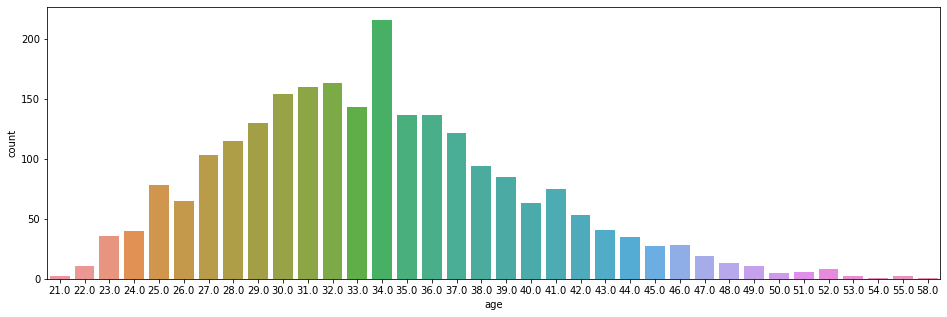

In [60]:
plt.figure(figsize=(16,5))
sns.countplot(grouped_df['age'])

<AxesSubplot:xlabel='gender', ylabel='count'>

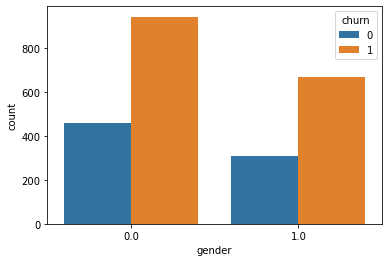

In [61]:
sns.countplot(x=grouped_df['gender'],hue=grouped_df['churn'])

In [62]:
grouped_df['education'].value_counts()

2    802
1    795
0    784
Name: education, dtype: int64

<AxesSubplot:xlabel='designation', ylabel='count'>

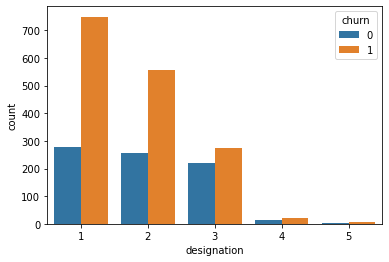

In [63]:
sns.countplot(x=grouped_df['designation'],hue = grouped_df['churn'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quarterly_rating', ylabel='count'>

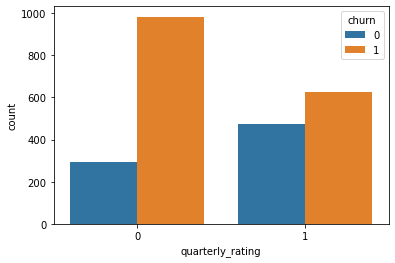

In [64]:
sns.countplot(grouped_df['quarterly_rating'],hue = grouped_df['churn'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income_change', ylabel='count'>

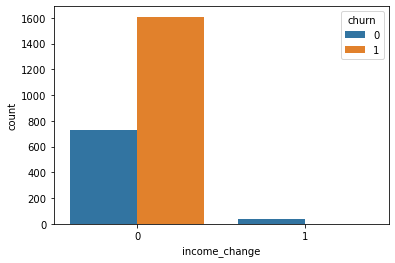

In [65]:
sns.countplot(grouped_df['income_change'],hue = grouped_df['churn'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

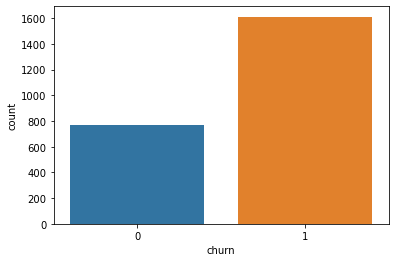

In [66]:
sns.countplot(grouped_df['churn'])

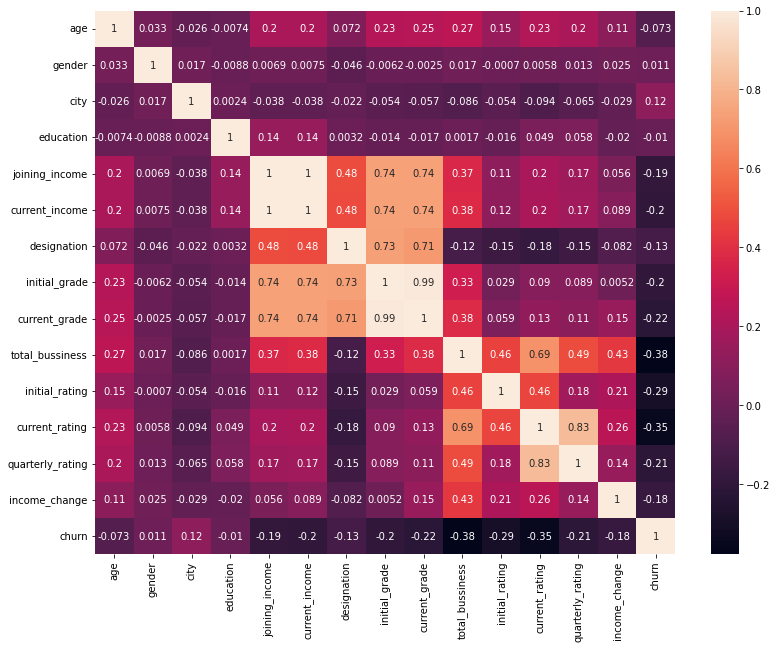

In [67]:
plt.figure(figsize=(13,10))
sns.heatmap(grouped_df.corr(),annot=True)
plt.show()

In [68]:
for i in grouped_df.columns:
    print(i,grouped_df[i].nunique())

reporting_start_date 24
reporting_end_date 24
age 36
gender 2
city 29
education 3
joining_income 2339
current_income 2339
joining_date 869
exit_date 493
designation 5
initial_grade 5
current_grade 5
total_bussiness 1626
initial_rating 4
current_rating 4
quarterly_rating 2
income_change 2
churn 2


In [69]:
grouped_df.drop(['initial_rating','current_rating','initial_grade','joining_date','exit_date','joining_date'],
                inplace = True,axis=1)

In [70]:
for i in grouped_df.columns:
    print(i,grouped_df[i].nunique())

reporting_start_date 24
reporting_end_date 24
age 36
gender 2
city 29
education 3
joining_income 2339
current_income 2339
designation 5
current_grade 5
total_bussiness 1626
quarterly_rating 2
income_change 2
churn 2


In [71]:
grouped_df.head()

,reporting_start_date,reporting_end_date,age,gender,city,education,joining_income,current_income,designation,current_grade,total_bussiness,quarterly_rating,income_change,churn
Driver_ID,,,,,,,,,,,,,,
1,2019-01-01,2019-03-01,28.0,0.0,0.105948,2,57387,57387,1,1,1715580,0,0,1
2,2020-11-01,2020-12-01,31.0,0.0,0.085386,2,67016,67016,2,2,0,0,0,0
4,2019-12-01,2020-04-01,43.0,0.0,0.101933,2,65603,65603,2,2,350000,0,0,1
5,2019-01-01,2019-03-01,29.0,0.0,0.101923,0,46368,46368,1,1,120360,0,0,1
6,2020-08-01,2020-12-01,31.0,1.0,0.096154,1,78728,78728,3,3,1265000,1,0,0


In [72]:
edu=pd.get_dummies(grouped_df['education'],prefix='education',drop_first=True)
grouped_df=pd.concat([grouped_df,edu],axis=1)

In [73]:
grouped_df.head()

,reporting_start_date,reporting_end_date,age,gender,city,education,joining_income,current_income,designation,current_grade,total_bussiness,quarterly_rating,income_change,churn,education_1,education_2
Driver_ID,,,,,,,,,,,,,,,,
1,2019-01-01,2019-03-01,28.0,0.0,0.105948,2,57387,57387,1,1,1715580,0,0,1,0,1
2,2020-11-01,2020-12-01,31.0,0.0,0.085386,2,67016,67016,2,2,0,0,0,0,0,1
4,2019-12-01,2020-04-01,43.0,0.0,0.101933,2,65603,65603,2,2,350000,0,0,1,0,1
5,2019-01-01,2019-03-01,29.0,0.0,0.101923,0,46368,46368,1,1,120360,0,0,1,0,0
6,2020-08-01,2020-12-01,31.0,1.0,0.096154,1,78728,78728,3,3,1265000,1,0,0,1,0


In [74]:
grouped_df = grouped_df.reset_index()

In [75]:
grouped_df.head()

,Driver_ID,reporting_start_date,reporting_end_date,age,gender,city,education,joining_income,current_income,designation,current_grade,total_bussiness,quarterly_rating,income_change,churn,education_1,education_2
0,1,2019-01-01,2019-03-01,28.0,0.0,0.105948,2,57387,57387,1,1,1715580,0,0,1,0,1
1,2,2020-11-01,2020-12-01,31.0,0.0,0.085386,2,67016,67016,2,2,0,0,0,0,0,1
2,4,2019-12-01,2020-04-01,43.0,0.0,0.101933,2,65603,65603,2,2,350000,0,0,1,0,1
3,5,2019-01-01,2019-03-01,29.0,0.0,0.101923,0,46368,46368,1,1,120360,0,0,1,0,0
4,6,2020-08-01,2020-12-01,31.0,1.0,0.096154,1,78728,78728,3,3,1265000,1,0,0,1,0


In [76]:
grouped_df.drop(['reporting_start_date','reporting_end_date'],axis = 1,inplace = True)

In [77]:
grouped_df.columns

Index(['Driver_ID', 'age', 'gender', 'city', 'education', 'joining_income',
       'current_income', 'designation', 'current_grade', 'total_bussiness',
       'quarterly_rating', 'income_change', 'churn', 'education_1',
       'education_2'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='joining_income'>

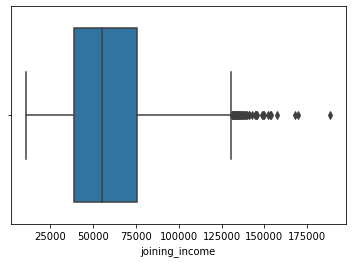

In [78]:
sns.boxplot(grouped_df['joining_income'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_income'>

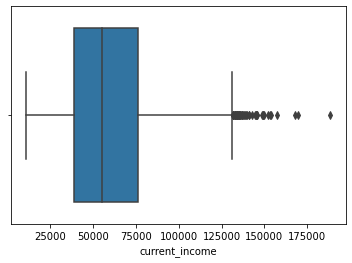

In [79]:
sns.boxplot(grouped_df['current_income'])

In [80]:
grouped_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.000000e+00,695.000000,1400.000000,2.100000e+03,2.788000e+03
age,2381.0,3.378958e+01,5.908034e+00,2.100000e+01,30.000000,33.000000,3.700000e+01,5.800000e+01
gender,2381.0,4.103318e-01,4.919972e-01,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00
city,2381.0,8.606014e-02,1.561639e-02,5.666667e-02,0.074799,0.083062,9.246575e-02,1.250000e-01
education,2381.0,1.007560e+00,8.162900e-01,0.000000e+00,0.000000,1.000000,2.000000e+00,2.000000e+00
joining_income,2381.0,5.920906e+04,2.827590e+04,1.074700e+04,39104.000000,55276.000000,7.576500e+04,1.884180e+05
current_income,2381.0,5.933616e+04,2.838301e+04,1.074700e+04,39104.000000,55315.000000,7.598600e+04,1.884180e+05
designation,2381.0,1.820244e+00,8.414334e-01,1.000000e+00,1.000000,2.000000,2.000000e+00,5.000000e+00
current_grade,2381.0,2.097018e+00,9.417017e-01,1.000000e+00,1.000000,2.000000,3.000000e+00,5.000000e+00
total_bussiness,2381.0,4.579832e+06,9.119725e+06,-1.385530e+06,0.000000,807040.000000,4.169060e+06,9.533106e+07


In [81]:
grouped_df.shape

(2381, 15)

In [82]:
grouped_df.quantile([0.05,0.1,0.5,0.7,0.8,0.9,0.95,0.97,0.98,0.99,1]).T

,0.05,0.10,0.50,0.70,0.80,0.90,0.95,0.97,0.98,0.99,1.00
Driver_ID,141.000000,284.000000,1400.000000,1.959000e+03,2.233000e+03,2.509000e+03,2.648000e+03,2.705600e+03,2.730400e+03,2.759200e+03,2.788000e+03
age,25.000000,27.000000,33.000000,3.600000e+01,3.800000e+01,4.200000e+01,4.500000e+01,4.600000e+01,4.800000e+01,5.000000e+01,5.800000e+01
gender,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
city,0.061805,0.070522,0.083062,9.067017e-02,1.019231e-01,1.101190e-01,1.165254e-01,1.165254e-01,1.250000e-01,1.250000e-01,1.250000e-01
education,0.000000,0.000000,1.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
joining_income,20170.000000,25459.000000,55276.000000,7.008800e+04,8.128800e+04,9.930000e+04,1.138070e+05,1.233784e+05,1.307636e+05,1.369844e+05,1.884180e+05
current_income,20170.000000,25459.000000,55315.000000,7.033900e+04,8.156100e+04,9.941500e+04,1.138070e+05,1.237416e+05,1.312396e+05,1.371556e+05,1.884180e+05
designation,1.000000,1.000000,2.000000,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
current_grade,1.000000,1.000000,2.000000,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.200000e+00,5.000000e+00
total_bussiness,0.000000,0.000000,807040.000000,2.945540e+06,5.958340e+06,1.497077e+07,2.347103e+07,3.014097e+07,3.478996e+07,4.313509e+07,9.533106e+07


In [83]:
grouped_df = grouped_df[grouped_df['joining_income']<grouped_df['joining_income'].quantile(0.98)]

In [84]:
grouped_df.shape

(2333, 15)

In [85]:
print(f'Percentage of rows removed is', np.round(100 - (2333/2381)*100,2))

Percentage of rows removed is 2.02


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='joining_income'>

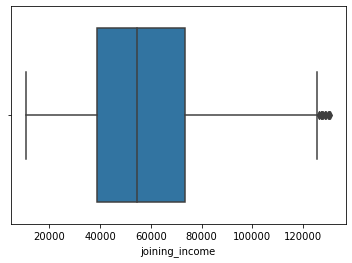

In [86]:
sns.boxplot(grouped_df['joining_income'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_income'>

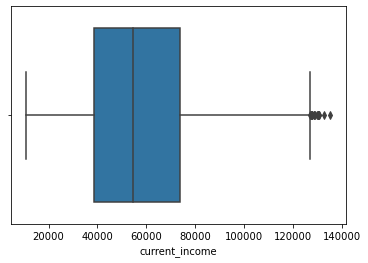

In [87]:
sns.boxplot(grouped_df['current_income'])

<AxesSubplot:>

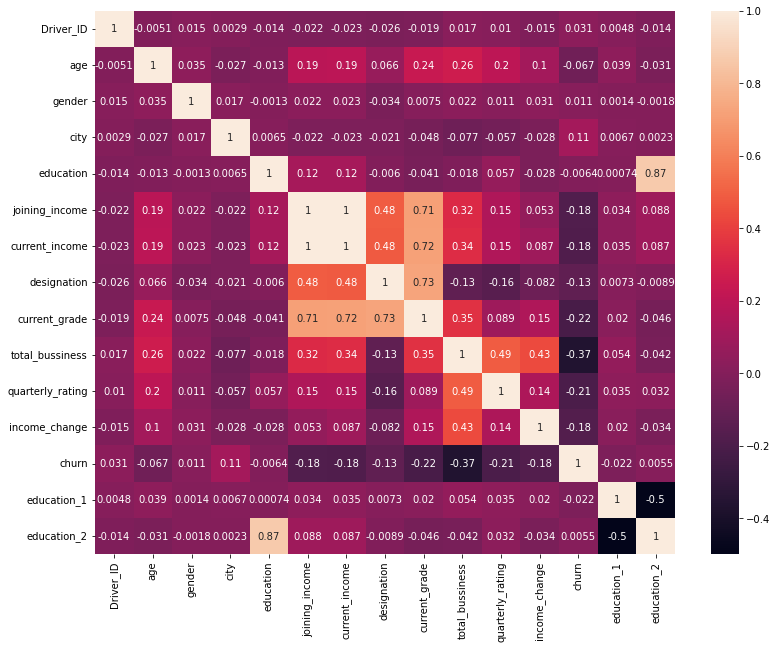

In [88]:
plt.figure(figsize=(13,10))
sns.heatmap(grouped_df.corr(),annot=True)

In [89]:
grouped_df.columns

Index(['Driver_ID', 'age', 'gender', 'city', 'education', 'joining_income',
       'current_income', 'designation', 'current_grade', 'total_bussiness',
       'quarterly_rating', 'income_change', 'churn', 'education_1',
       'education_2'],
      dtype='object')

In [90]:
grouped_df.drop(['education','joining_income','current_grade'],inplace=True,axis=1)

<AxesSubplot:>

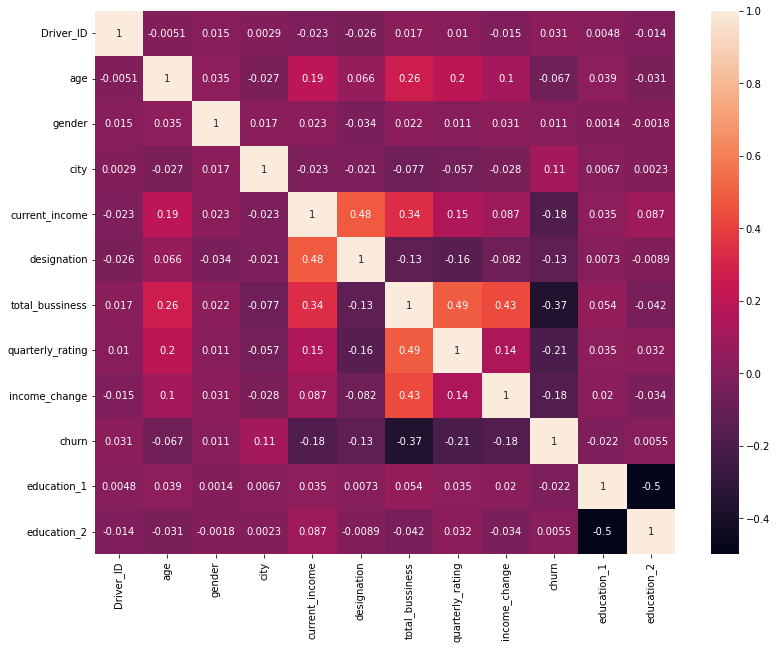

In [91]:
plt.figure(figsize=(13,10))
sns.heatmap(grouped_df.corr(),annot=True)

In [92]:
grouped_df.columns

Index(['Driver_ID', 'age', 'gender', 'city', 'current_income', 'designation',
       'total_bussiness', 'quarterly_rating', 'income_change', 'churn',
       'education_1', 'education_2'],
      dtype='object')

In [93]:
y = grouped_df['churn']

In [94]:
grouped_df.drop(['churn'],inplace = True, axis = 1)

In [95]:
columns = grouped_df.columns

In [96]:
scaler = StandardScaler()
grouped_df = scaler.fit_transform(grouped_df)

In [97]:
grouped_df = pd.DataFrame(grouped_df,columns=columns)

In [98]:
grouped_df.head()

,Driver_ID,age,gender,city,current_income,designation,total_bussiness,quarterly_rating,income_change,education_1,education_2
0,-1.734914,-0.972352,-0.837662,1.266088,-0.009970,-0.980752,-0.300427,-0.917255,-0.135398,-0.708016,1.416490
1,-1.733671,-0.462577,-0.837662,-0.048920,0.359957,0.240868,-0.499117,-0.917255,-0.135398,-0.708016,1.416490
2,-1.731185,1.576521,-0.837662,1.009333,0.305673,0.240868,-0.458582,-0.917255,-0.135398,-0.708016,1.416490
3,-1.729942,-0.802427,-0.837662,1.008684,-0.433297,-0.980752,-0.485177,-0.917255,-0.135398,-0.708016,-0.705971
4,-1.728699,-0.462577,1.193799,0.639725,0.809909,1.462488,-0.352611,1.090209,-0.135398,1.412397,-0.705971


In [99]:
#dropping driverID as it is not useful churn
grouped_df.drop(['Driver_ID'],inplace=True,axis = 1) 

In [100]:
grouped_df.head()

,age,gender,city,current_income,designation,total_bussiness,quarterly_rating,income_change,education_1,education_2
0,-0.972352,-0.837662,1.266088,-0.009970,-0.980752,-0.300427,-0.917255,-0.135398,-0.708016,1.416490
1,-0.462577,-0.837662,-0.048920,0.359957,0.240868,-0.499117,-0.917255,-0.135398,-0.708016,1.416490
2,1.576521,-0.837662,1.009333,0.305673,0.240868,-0.458582,-0.917255,-0.135398,-0.708016,1.416490
3,-0.802427,-0.837662,1.008684,-0.433297,-0.980752,-0.485177,-0.917255,-0.135398,-0.708016,-0.705971
4,-0.462577,1.193799,0.639725,0.809909,1.462488,-0.352611,1.090209,-0.135398,1.412397,-0.705971


In [101]:
X_train,X_test,y_train,y_test = train_test_split(grouped_df,y,test_size=0.2,shuffle=True)

In [102]:
y_train.value_counts()

1    1275
0     591
Name: churn, dtype: int64

In [103]:
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(X_train,y_train)

In [104]:
y_train.shape

(1866,)

In [105]:
x_sm.shape

(2550, 10)

In [106]:
y_sm.value_counts()

1    1275
0    1275
Name: churn, dtype: int64

In [107]:
grouped_df.describe()

,age,gender,city,current_income,designation,total_bussiness,quarterly_rating,income_change,education_1,education_2
count,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03,2.333000e+03
mean,4.192008e-16,-1.407171e-16,-7.105808e-16,-4.616015e-18,-4.618038e-16,1.479623e-16,1.888283e-16,-2.098621e-16,-2.232819e-16,-1.637020e-16
std,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00
min,-2.161826e+00,-8.376620e-01,-1.885600e+00,-1.801785e+00,-9.807517e-01,-6.595825e-01,-9.172554e-01,-1.353980e-01,-7.080162e-01,-7.059705e-01
25%,-6.325023e-01,-8.376620e-01,-7.260070e-01,-7.307679e-01,-9.807517e-01,-4.991170e-01,-9.172554e-01,-1.353980e-01,-7.080162e-01,-7.059705e-01
50%,-1.227276e-01,-8.376620e-01,-1.975458e-01,-1.170406e-01,2.408680e-01,-4.105218e-01,-9.172554e-01,-1.353980e-01,-7.080162e-01,-7.059705e-01
75%,5.569720e-01,1.193799e+00,4.038599e-01,6.256944e-01,2.408680e-01,-3.681955e-02,1.090209e+00,-1.353980e-01,1.412397e+00,1.416490e+00
max,4.125395e+00,1.193799e+00,2.484524e+00,2.980640e+00,3.905727e+00,1.054167e+01,1.090209e+00,7.385636e+00,1.412397e+00,1.416490e+00


### Bagging : Random Forest

In [108]:
params = {
    "n_estimators": [10,25,50,100,115,125,150],
    "max_depth" : [3, 5, 6,7,9],
    "max_leaf_nodes" : [15, 20, 25,30]
}

rfc = RFC(n_jobs = -1)
clf = RandomizedSearchCV(rfc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

clf.fit(x_sm, y_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 6, 7, 9],
                                        'max_leaf_nodes': [15, 20, 25, 30],
                                        'n_estimators': [10, 25, 50, 100, 115,
                                                         125, 150]},
                   scoring='accuracy', verbose=1)

In [109]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'n_estimators': 150, 'max_leaf_nodes': 15, 'max_depth': 3} Mean_score: 0.7011764705882353 Rank: 8
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 20, 'max_depth': 5} Mean_score: 0.7137254901960786 Rank: 7
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 25, 'max_depth': 9} Mean_score: 0.7274509803921569 Rank: 1
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 15, 'max_depth': 5} Mean_score: 0.7168627450980392 Rank: 6
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 30, 'max_depth': 6} Mean_score: 0.7270588235294118 Rank: 3
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 30, 'max_depth': 3} Mean_score: 0.6960784313725491 Rank: 9
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 20, 'max_depth': 3} Mean_score: 0.6933333333333334 Rank: 10
Parameters:{'n_estimators': 115, 'max_leaf_nodes': 20, 'max_depth': 7} Mean_score: 0.7274509803921569 Rank: 1
Parameters:{'n_estimators': 115, 'max_leaf_nodes': 15, 'max_depth': 9} Mean_score: 0.7219607843137256 Rank: 5
Parameters:{

In [110]:
print(clf.best_estimator_)

RandomForestClassifier(max_depth=9, max_leaf_nodes=25, n_estimators=150,
                       n_jobs=-1)


In [111]:
rf = clf.best_estimator_

rf.fit(x_sm, y_sm)

print("Model acc",rf.score(X_test, y_test))

Model acc 0.7002141327623126


In [112]:
y_pred = rf.predict(X_test)

In [113]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 83,  68],
       [ 72, 244]], dtype=int64)

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.55      0.54       151
           1       0.78      0.77      0.78       316

    accuracy                           0.70       467
   macro avg       0.66      0.66      0.66       467
weighted avg       0.70      0.70      0.70       467



### Boosting : GBDT

In [115]:

gbc = GBC(n_estimators=300, learning_rate=0.25, max_depth=4, random_state=0, verbose = 1).fit(x_sm, y_sm)

print(f"Training accuracy:{gbc.score(x_sm, y_sm)}\nTest Accuracy: {gbc.score(X_test, y_test)}")

      Iter       Train Loss   Remaining Time 
         1           1.2612            4.67s
         2           1.1840            2.33s
         3           1.1311            4.48s
         4           1.0856            3.35s
         5           1.0491            4.17s
         6           1.0227            3.86s
         7           1.0033            3.63s
         8           0.9874            3.75s
         9           0.9725            3.59s
        10           0.9467            3.22s
        20           0.8351            2.92s
        30           0.7569            2.74s
        40           0.6942            2.48s
        50           0.6503            2.43s
        60           0.6028            2.31s
        70           0.5593            2.16s
        80           0.5251            2.08s
        90           0.4955            1.99s
       100           0.4590            1.89s
       200           0.2601            0.93s
       300           0.1589            0.00s
Training 

In [116]:
y_pred = gbc.predict(X_test)

In [117]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 76,  75],
       [ 51, 265]], dtype=int64)

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55       151
           1       0.78      0.84      0.81       316

    accuracy                           0.73       467
   macro avg       0.69      0.67      0.68       467
weighted avg       0.72      0.73      0.72       467

